In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [41]:
df=pd.read_csv("../../Data/Imputed.csv",dtype={"PUMA":"str"})

FileNotFoundError: [Errno 2] File ../../Data/Imputed.csv does not exist: '../../Data/Imputed.csv'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246502 entries, 0 to 246501
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HINCP_x     246502 non-null  float64
 1   SMOCP       246502 non-null  float64
 2   NP          246502 non-null  int64  
 3   BDSP        246502 non-null  float64
 4   INSP        246502 non-null  float64
 5   RMSP        246502 non-null  float64
 6   VALP        246502 non-null  float64
 7   TAXAMT      246502 non-null  float64
 8   ACR_<1.0>   246502 non-null  float64
 9   ACR_<2.0>   246502 non-null  float64
 10  ACR_<3.0>   246502 non-null  float64
 11  BUS_<1.0>   246502 non-null  float64
 12  BUS_<2.0>   246502 non-null  float64
 13  BUS_<9.0>   246502 non-null  float64
 14  FS_<1.0>    246502 non-null  float64
 15  FS_<2.0>    246502 non-null  float64
 16  TOIL_<1.0>  246502 non-null  float64
 17  TOIL_<2.0>  246502 non-null  float64
 18  TOIL_<9.0>  246502 non-null  float64
 19  VE

In [4]:
income_bin_freq=pd.DataFrame([
    {"bin_name":"Poverty","count":sum(df["HINCP_x"]<48500)},
    {"bin_name":"Middleclass","count":sum((df["HINCP_x"] >= 48500) & (df["HINCP_x"] <= 145000))},
    {"bin_name":"Upper Class","count":sum(df["HINCP_x"] > 145500)}
   
])

In [5]:
df["HINCP_x"]<25624

0         False
1         False
2         False
3         False
4         False
          ...  
246497    False
246498    False
246499    False
246500    False
246501    False
Name: HINCP_x, Length: 246502, dtype: bool

In [6]:
income_bin_freq

,bin_name,count
0,Poverty,96027
1,Middleclass,114759
2,Upper Class,35563


FileNotFoundError: [Errno 2] No such file or directory: '../../../Reports/Figures/Income plot.png'

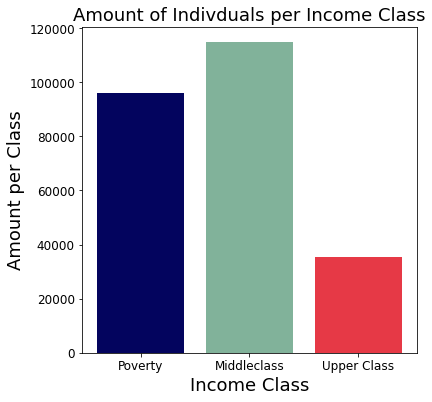

In [18]:
fig, ax = plt.subplots(figsize=((6,6)))
plt.bar(income_bin_freq["bin_name"],income_bin_freq["count"],color=["#03045e","#81b29a","#e63946"])
plt.xlabel("Income Class",fontsize=18)
plt.ylabel("Amount per Class",fontsize=18)
plt.tick_params(axis="both",labelsize=12)
plt.title("Amount of Indivduals per Income Class",fontsize=18)
# plt.legend()
plt.savefig("../../Reports/Figures/Income plot",transparent=True,bbox_inches="tight", pad_inches=.2)


From this we can see the data is not completly income with low values or in the poverty class. We do have some high values of income around 10% or so.

In [9]:
tax_bin_freq=pd.DataFrame([
    {"bin_name":"10%","count":sum(df["HINCP_x"]<13600)},
    {"bin_name":"12%","count":sum((df["HINCP_x"] >= 13600) & (df["HINCP_x"] <= 51800))},
    {"bin_name":"22%","count":sum((df["HINCP_x"] >= 51800) & (df["HINCP_x"] <= 82500))},
    {"bin_name":"24%","count":sum((df["HINCP_x"] >= 82500) & (df["HINCP_x"] <= 157500))},
    {"bin_name":"32%","count":sum((df["HINCP_x"] >= 157500) & (df["HINCP_x"] <= 200000))},
    {"bin_name":"35%","count":sum((df["HINCP_x"] >= 200000) & (df["HINCP_x"] <= 500000))},
    {"bin_name":"37%","count":sum(df["HINCP_x"] > 500000)}
   
])

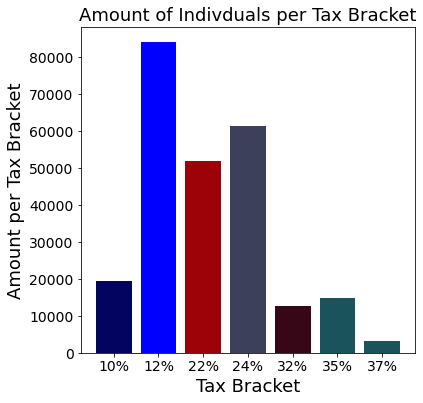

In [11]:
fig, ax = plt.subplots(figsize=((6,6)))
plt.xlabel("Tax Bracket",fontsize=18)
plt.ylabel("Amount per Tax Bracket",fontsize=18)
plt.tick_params(axis="both",labelsize=14)
plt.title("Amount of Indivduals per Tax Bracket",fontsize=18)
# plt.legend()
plt.savefig("Tax plot",transparent=True)
plt.bar(tax_bin_freq["bin_name"],tax_bin_freq["count"],color=["#03045e","blue","#9d0208","#3d405b","#370617","#1a535c","#1a535c"]);
plt.savefig("../../Reports/Figures/Tax plot",transparent=True,bbox_inches="tight",pad_inches=.2)


Howver when you look in terms of tax brackers we can see that majorty of our daya is within  the 12% braket meaning income between ~13k to ~52k. This makes sense due to that being  a large income range most individuals would fall into.

In [13]:
import geopandas as gpd

ImportError: DLL load failed while importing _datadir: The specified module could not be found.

In [3]:
il_1=gpd.read_file("./tl_2016_17_cousub/tl_2016_17_cousub.shp")

In [6]:
il_1

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,173,35567,00429140,1717335567,Holland,Holland township,44,T1,G4040,None,None,None,A,69901484,0,+39.2486394,-088.7499697,"POLYGON ((-88.80588 39.28134, -88.80587 39.281..."
1,17,173,55145,00429475,1717355145,Oconee,Oconee township,44,T1,G4040,None,None,None,A,142742871,217833,+39.2781625,-089.0840426,"POLYGON ((-89.14008 39.21791, -89.13967 39.231..."
2,17,139,45083,00429288,1713945083,Lowe,Lowe township,44,T1,G4040,None,None,None,A,105167777,0,+39.7436650,-088.5299656,"POLYGON ((-88.58752 39.79213, -88.58527 39.792..."
3,17,033,43315,00429256,1703343315,Licking,Licking township,44,T1,G4040,None,None,None,A,105405190,33426,+39.1237278,-087.8944532,"POLYGON ((-87.95039 39.16597, -87.95038 39.174..."
4,17,173,06002,00428674,1717306002,Big Spring,Big Spring township,44,T1,G4040,None,None,None,A,75955831,896941,+39.3113874,-088.5246717,"POLYGON ((-88.58231 39.33132, -88.58227 39.334..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,17,163,04858,00428652,1716304858,Belleville,Belleville township,44,T5,G4040,None,None,None,B,60174083,691205,+38.5159726,-089.9897789,"MULTIPOLYGON (((-89.95696 38.52891, -89.95668 ..."
1706,17,163,12210,00428782,1716312210,Centreville,Centreville township,44,T1,G4040,None,None,None,A,72356958,3857307,+38.5742688,-090.1488091,"POLYGON ((-90.22306 38.57573, -90.22210 38.576..."
1707,17,163,69550,00429746,1716369550,Shiloh Valley,Shiloh Valley township,44,T1,G4040,None,None,None,A,82247896,545304,+38.5290895,-089.8735855,"MULTIPOLYGON (((-89.91732 38.48365, -89.91722 ..."
1708,17,163,72988,00429803,1716372988,Stookey,Stookey township,44,T1,G4040,None,None,None,A,68884511,548833,+38.5192474,-090.0912082,"MULTIPOLYGON (((-90.03727 38.55596, -90.03718 ..."


In [ ]:
17 00300

In [15]:
il_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1710 non-null   object  
 1   COUNTYFP  1710 non-null   object  
 2   COUSUBFP  1710 non-null   object  
 3   COUSUBNS  1710 non-null   object  
 4   GEOID     1710 non-null   object  
 5   NAME      1710 non-null   object  
 6   NAMELSAD  1710 non-null   object  
 7   LSAD      1710 non-null   object  
 8   CLASSFP   1710 non-null   object  
 9   MTFCC     1710 non-null   object  
 10  CNECTAFP  0 non-null      object  
 11  NECTAFP   0 non-null      object  
 12  NCTADVFP  0 non-null      object  
 13  FUNCSTAT  1710 non-null   object  
 14  ALAND     1710 non-null   int64   
 15  AWATER    1710 non-null   int64   
 16  INTPTLAT  1710 non-null   object  
 17  INTPTLON  1710 non-null   object  
 18  geometry  1710 non-null   geometry
dtypes: geometry(1), int64(2), object(16)
mem

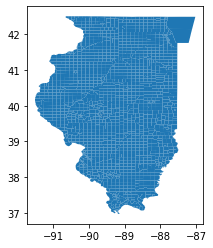

In [5]:
il_1.plot()

In [9]:
num="17-state 17-state33-5567"

In [10]:
len(num)

10

In [11]:
il_2=gpd.read_file("./tl_2018_17_puma10/tl_2018_17_puma10.shp")

In [12]:
il_2

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,17,03411,1703411,Cook County (South Central)--Worth & Calumet T...,G6120,S,94129155,1576803,+41.7313634,-087.7167725,"POLYGON ((-87.72144 41.73486, -87.72142 41.734..."
1,17,03107,1703107,"Will County (Northeast)--Frankfort, Homer & Ne...",G6120,S,243596923,478565,+41.5528956,-087.9168232,"POLYGON ((-87.86079 41.55752, -87.85730 41.557..."
2,17,03700,1703700,Kendall & Grundy Counties PUMA,G6120,S,1912412909,37262592,+41.4200983,-088.4339373,"POLYGON ((-88.26810 41.72454, -88.26195 41.724..."
3,17,02000,1702000,McLean County PUMA,G6120,S,3064559693,7853695,+40.4945594,-088.8445391,"POLYGON ((-88.92933 40.75334, -88.92618 40.753..."
4,17,01602,1701602,"Menard, Logan, De Witt, Piatt, Moultrie, Shelb...",G6120,S,9254202416,88234698,+39.7699432,-089.2258108,"POLYGON ((-88.49425 39.21500, -88.49929 39.215..."
...,...,...,...,...,...,...,...,...,...,...,...
83,17,01104,1701104,St. Clair County (Central & Northeast) PUMA,G6120,S,725829299,10181228,+38.5249488,-089.8964892,"POLYGON ((-89.85468 38.39457, -89.85670 38.394..."
84,17,02501,1702501,"Knox, Stark, Bureau, Marshall & Woodford Count...",G6120,S,7635933871,121173248,+41.0840453,-089.6180327,"POLYGON ((-89.36926 40.74816, -89.37241 40.748..."
85,17,02601,1702601,DeKalb County PUMA,G6120,S,1635178669,8532272,+41.8946125,-088.7689910,"POLYGON ((-88.72518 42.15358, -88.71655 42.153..."
86,17,03009,1703009,Kane County (West) PUMA,G6120,S,949347426,1852756,+41.9377236,-088.4689136,"POLYGON ((-88.41589 42.15432, -88.41390 42.154..."


using this map bc it sinks up with the data from the census for the cook countrt south central

In [14]:
il_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   88 non-null     object  
 1   PUMACE10    88 non-null     object  
 2   GEOID10     88 non-null     object  
 3   NAMELSAD10  88 non-null     object  
 4   MTFCC10     88 non-null     object  
 5   FUNCSTAT10  88 non-null     object  
 6   ALAND10     88 non-null     int64   
 7   AWATER10    88 non-null     int64   
 8   INTPTLAT10  88 non-null     object  
 9   INTPTLON10  88 non-null     object  
 10  geometry    88 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 7.7+ KB


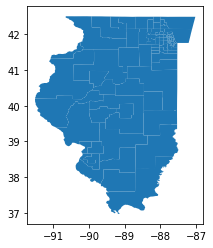

In [13]:
il_2.plot()

Looking at some maps to make the visual for the slides.